In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
transaction_df = pd.read_excel("/kaggle/input/quantium/QVI_transaction_data.xlsx")
behavior_df = pd.read_csv("/kaggle/input/quantium/QVI_purchase_behaviour.csv")

In [3]:
transaction_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [4]:
behavior_df.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [5]:
# merging the two dataframes
df = transaction_df.merge(behavior_df, on='LYLTY_CARD_NBR')

In [6]:
# renaming the PREMIUM_CUSTOMER column
df = df.rename(columns={'PREMIUM_CUSTOMER': 'CUSTOMER_SEGMENT'})

In [7]:
# transforming the timestamp column to datetime format
#df['DATE'] = pd.to_datetime(df['DATE'], unit='s')
#df['YEAR'] = df['DATE'].dt.year.astype(int)
import datetime
def convert_excel_date(excel_date):
    return datetime.datetime(1899, 12, 30) + datetime.timedelta(days=excel_date)

# Assuming df is your DataFrame and 'Date' is the column with Excel dates
df['DATE'] = df['DATE'].apply(convert_excel_date)

In [8]:
# creating a PACK_SIZE column
df['PACK_SIZE'] = df['PROD_NAME'].str.extract(r'(\d+)').astype(int)


In [9]:
df['BRAND'] = df['PROD_NAME'].str.split().str[0]

In [10]:
print(f'df shape is {df.shape}')

df shape is (264836, 12)


In [11]:
# Checking for null values
df.isnull().sum()

DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
LIFESTAGE           0
CUSTOMER_SEGMENT    0
PACK_SIZE           0
BRAND               0
dtype: int64

In [12]:
# Dropping duplicates
print(f'{df.duplicated().sum()} rows are duplicated')
df.drop_duplicates(inplace=True)
print(f'{df.duplicated().sum()} rows are duplicated after dropping')

1 rows are duplicated
0 rows are duplicated after dropping


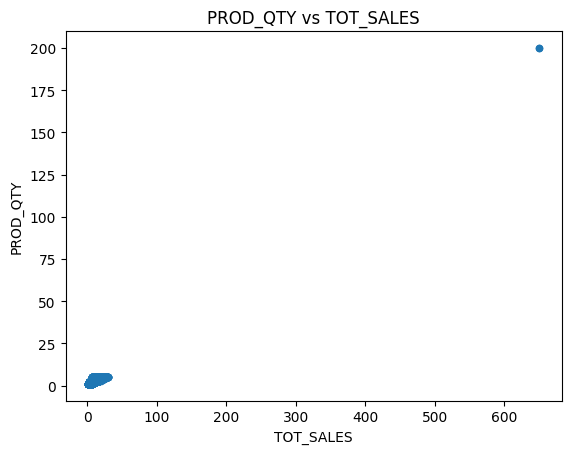

In [13]:
# Performing visual inspection to check for outliers
df.plot(kind='scatter', x='TOT_SALES', y='PROD_QTY', title='PROD_QTY vs TOT_SALES')
plt.show()

PROD_QTY
2      236038
1       27518
5         450
3         430
4         397
200         2
Name: count, dtype: int64


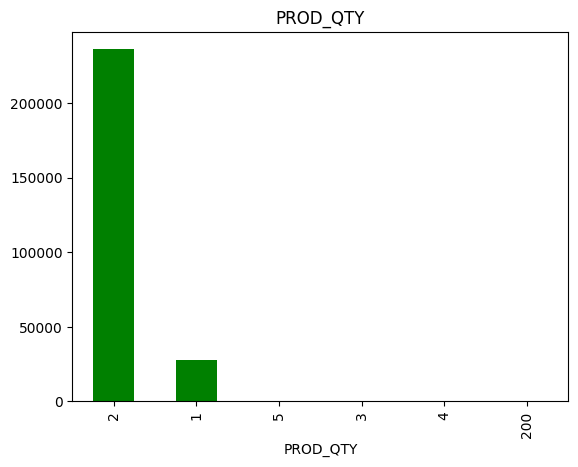

In [14]:
print(df['PROD_QTY'].value_counts())
df['PROD_QTY'].value_counts().plot(kind='bar', title='PROD_QTY', color='green')
plt.show() 
# it's clear that the most frequent order quantity is 2 followed by 1

In [15]:
# Check the shape of the filtered dataframe
df = df[(df['PROD_QTY'] > 0) & (df['PROD_QTY'] <= 5)]
df.shape
# we have only 2 outliers

(264833, 12)

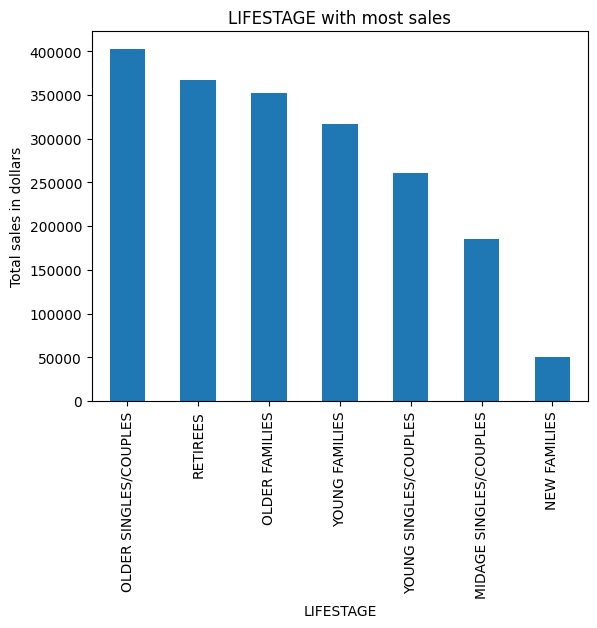

In [16]:
df.groupby('LIFESTAGE')['TOT_SALES'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.xlabel("LIFESTAGE")
plt.ylabel("Total sales in dollars")
plt.title("LIFESTAGE with most sales")
plt.show()

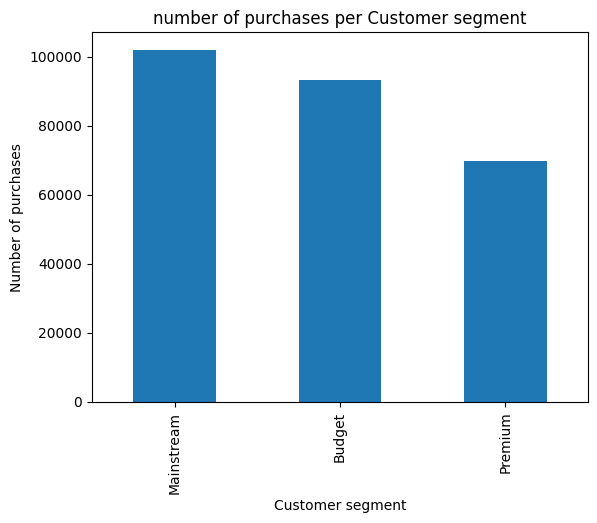

In [17]:
# Customer segments
df['CUSTOMER_SEGMENT'].value_counts().plot(kind='bar')
plt.xlabel("Customer segment")
plt.ylabel("Number of purchases")
plt.title('number of purchases per Customer segment')
plt.show()

In [18]:
print(f"there's {len(df['PROD_NAME'].unique())} unique products in the dataset,\nand these are the top 10 most sold products: ")
# there are 114 different products in the dataset
df['PROD_NAME'].value_counts().head(10)

there's 114 unique products in the dataset,
and these are the top 10 most sold products: 


PROD_NAME
Kettle Mozzarella   Basil & Pesto 175g      3304
Kettle Tortilla ChpsHny&Jlpno Chili 150g    3296
Cobs Popd Swt/Chlli &Sr/Cream Chips 110g    3269
Tyrrells Crisps     Ched & Chives 165g      3268
Cobs Popd Sea Salt  Chips 110g              3265
Kettle 135g Swt Pot Sea Salt                3257
Tostitos Splash Of  Lime 175g               3252
Infuzions Thai SweetChili PotatoMix 110g    3242
Smiths Crnkle Chip  Orgnl Big Bag 380g      3233
Thins Potato Chips  Hot & Spicy 175g        3229
Name: count, dtype: int64

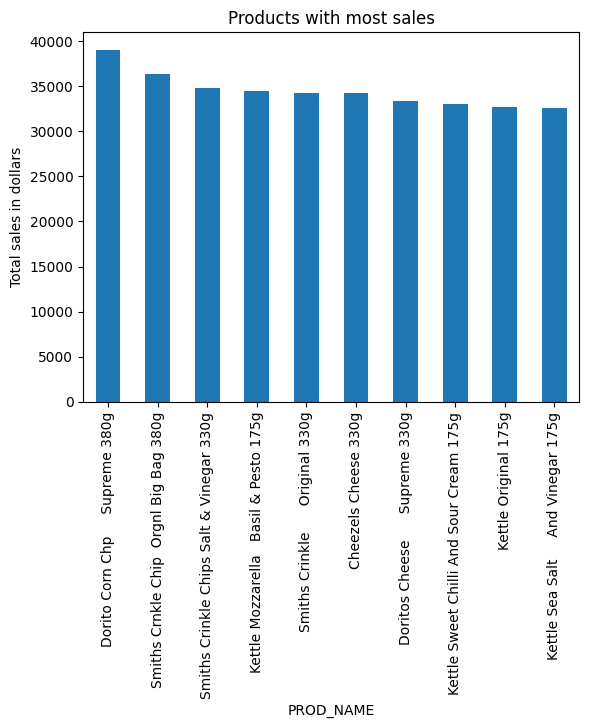

In [19]:
# products with highest TOT_SALES
df.groupby('PROD_NAME')['TOT_SALES'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.xlabel("PROD_NAME")
plt.ylabel("Total sales in dollars")
plt.title("Products with most sales")
plt.show()

there's 272 unique stores,
and these are the store numbers with highest number of purchases: 


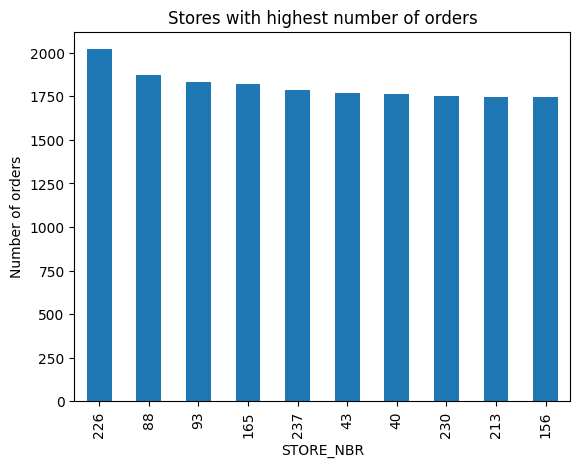

In [20]:
# stores with highest number of orders
print(f"there's {len(df['STORE_NBR'].unique())} unique stores,\nand these are the store numbers with highest number of purchases: ")
df["STORE_NBR"].value_counts().head(10).plot(kind='bar')
plt.xlabel("STORE_NBR")
plt.ylabel("Number of orders")
plt.title("Stores with highest number of orders")
plt.show()

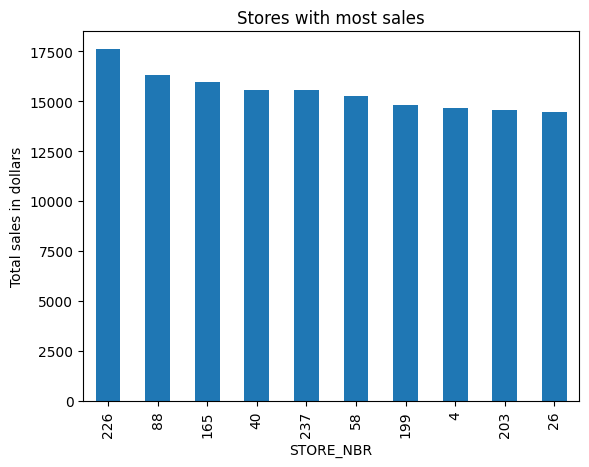

In [21]:
# stores with highest TOT_SALES
df.groupby('STORE_NBR')['TOT_SALES'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.xlabel("STORE_NBR")
plt.ylabel("Total sales in dollars") 
plt.title("Stores with most sales")
plt.show()

0


<Axes: title={'center': 'number of orders per PACK_SIZE in grams'}, ylabel='Frequency'>

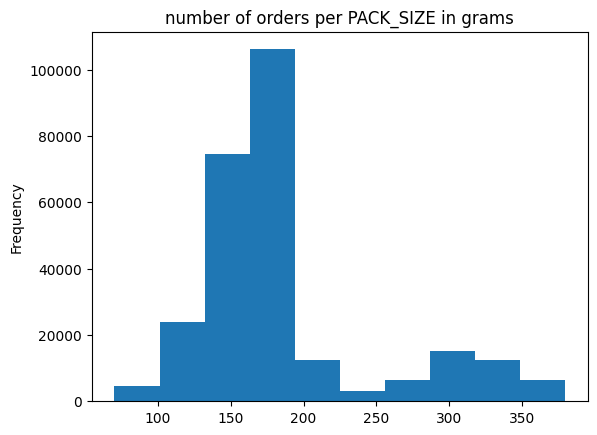

In [22]:
print(df['PACK_SIZE'].isna().sum())
df['PACK_SIZE'].plot(kind='hist', title='number of orders per PACK_SIZE in grams', bins=10)
# it's clear that the most purchased pack size is 175g followed by 150g

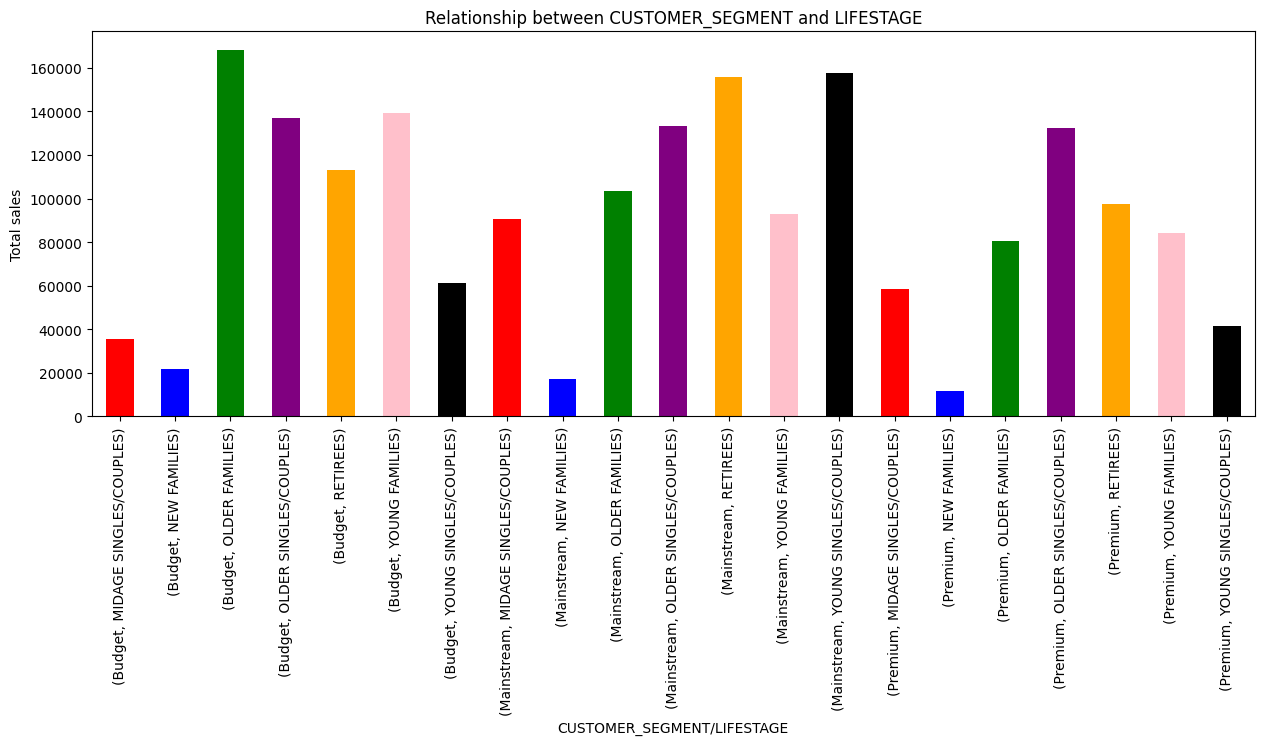

In [23]:
# relationship between CUSTOMER_SEGMENT and LIFESTAGE

color_dict = {'YF': 'red', 'OF': 'blue', 'YA': 'green', 'OA': 'purple', 'MA': 'orange', 'PE': 'pink', 'CE': 'black'}
df.groupby(['CUSTOMER_SEGMENT', 'LIFESTAGE'])['TOT_SALES'].agg('sum').plot(kind='bar', color=color_dict.values(), figsize=(15, 5))
plt.xlabel("CUSTOMER_SEGMENT/LIFESTAGE")
plt.ylabel("Total sales")
plt.title("Relationship between CUSTOMER_SEGMENT and LIFESTAGE")
plt.show()

We can see that the *OLDER FAMILIES* life stage segment take up most of the *Budget* customer segment followed by the *YOUNG FAMILIES*,
and the *YOUNG SINGLES* life stage segment take up most of the *Mainstream* customer segment followed by *RETIREES*,
and the *OLDER SINGLES* life stage segment take up most of the *Premium* customer segment followed by *RETIREES*

In [24]:
df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,CUSTOMER_SEGMENT,PACK_SIZE,BRAND
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium,175,Natural
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget,175,CCs
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,MIDAGE SINGLES/COUPLES,Budget,160,WW
3,2019-03-09,1,1307,347,54,CCs Original 175g,1,2.1,MIDAGE SINGLES/COUPLES,Budget,175,CCs
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget,170,Smiths


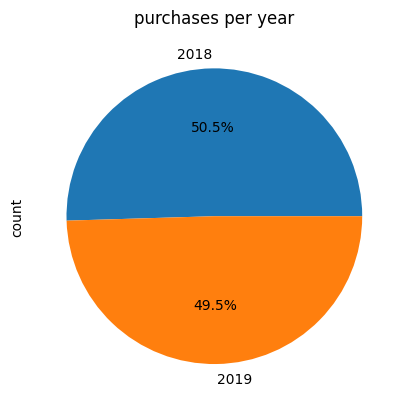

In [25]:
df['DATE'].dt.year.value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('purchases per year')
plt.show()

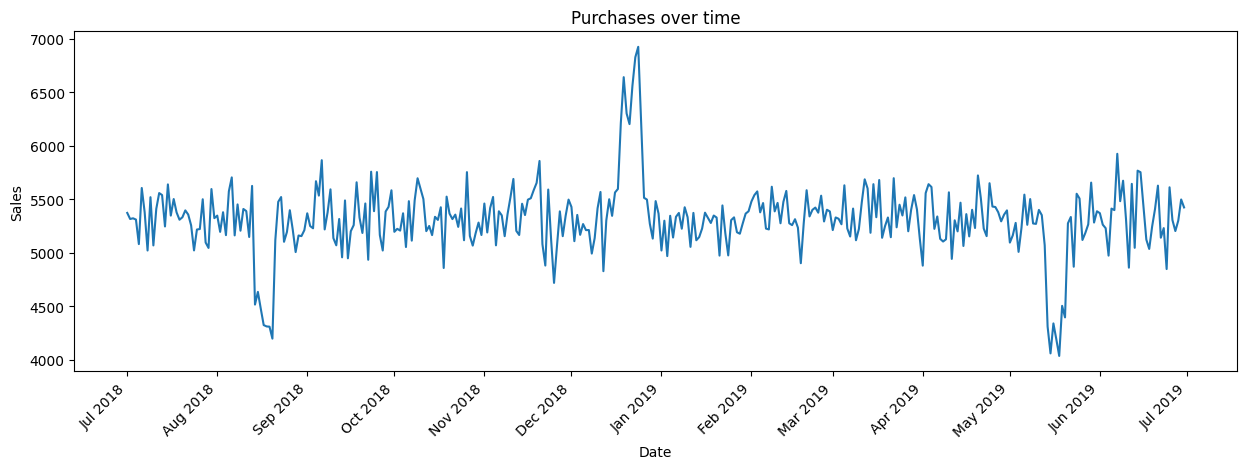

In [26]:
first_day_of_month_ticks = pd.date_range(start='2018-07-01', end='2019-07-01', freq='MS')

df.groupby('DATE')['TOT_SALES'].agg("sum").plot(kind='line', figsize=(15, 5))
plt.xticks(first_day_of_month_ticks, [date.strftime('%b %Y') for date in first_day_of_month_ticks], rotation=45)
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Purchases over time')
plt.show()

In [28]:
df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,CUSTOMER_SEGMENT,PACK_SIZE,BRAND
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium,175,Natural
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget,175,CCs
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,MIDAGE SINGLES/COUPLES,Budget,160,WW
3,2019-03-09,1,1307,347,54,CCs Original 175g,1,2.1,MIDAGE SINGLES/COUPLES,Budget,175,CCs
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget,170,Smiths


In [42]:
result = df.groupby('DATE')['PROD_QTY'].agg(TOT_ORDERRS='sum').reset_index()
result = result.sort_values(by='TOT_ORDERRS', ascending=False).head()
result

,DATE,TOT_ORDERRS
176,2018-12-24,1818
175,2018-12-23,1771
174,2018-12-22,1746
171,2018-12-19,1734
170,2018-12-18,1651


In [44]:
result = df.groupby('DATE')['TOT_SALES'].agg(TOT_SALES='sum').reset_index()
result = result.sort_values(by='TOT_SALES', ascending=False).head()
result

,DATE,TOT_SALES
176,2018-12-24,6923.0
175,2018-12-23,6826.0
171,2018-12-19,6639.8
174,2018-12-22,6558.7
172,2018-12-20,6300.8


# from the analysis we can see that most of the sales are made by budget buyers mostly by the older families age segment followed by young singles from the mainstream segment and then older singles from the premium customer segment and most people are multipack buyers